
Logistic Regression with Cluster Feature Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.77      0.62       155
           1       0.49      0.23      0.32       145

    accuracy                           0.51       300
   macro avg       0.50      0.50      0.47       300
weighted avg       0.50      0.51      0.47       300

ROC-AUC Score: 0.5228031145717464

Random Forest with Cluster Feature Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52       155
           1       0.50      0.54      0.52       145

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

ROC-AUC Score: 0.5159510567296997


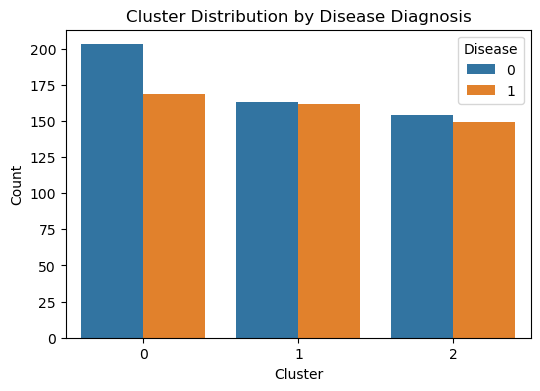

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Dataset ---
df = pd.read_csv("healthcare_dataset.csv")

# --- 2. Encode Categorical Variables ---
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])
df['Disease_Diagnosis'] = df['Disease_Diagnosis'].map({'Yes': 1, 'No': 0})

# --- 3. K-Means Clustering on Unlabeled Features ---
cluster_features = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Heart_Rate']
X_cluster = df[cluster_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 4. Prepare Dataset for Supervised Learning ---
model_features = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Smoking_Status', 'Cluster']
X = df[model_features]
y = df['Disease_Diagnosis']

# Encode 'Cluster' if needed (it’s already numeric here)
# Optionally one-hot encode it if models benefit from non-linear separation

# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 6. Train Logistic Regression ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# --- 7. Train Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# --- 8. Evaluation ---
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_proba))

evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression with Cluster Feature")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest with Cluster Feature")

# --- 9. (Optional) Visualize Cluster Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', hue='Disease_Diagnosis', data=df)
plt.title("Cluster Distribution by Disease Diagnosis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Disease")
plt.show()

